In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

In [8]:
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

In [9]:
models = {
    "SVM with linear kernel, one-vs-rest": OneVsRestClassifier(SVC(kernel='linear')).fit(X, y),
    "SVM with linear kernel, one-vs-one": OneVsOneClassifier(SVC(kernel='linear')).fit(X, y),
    "SVM with rbf kernel, one-vs-rest": OneVsRestClassifier(SVC(kernel='rbf')).fit(X, y),
    "SVM with polynomial kernel (d=3), one-vs-rest": OneVsRestClassifier(SVC(kernel='poly', degree=3)).fit(X, y),
}

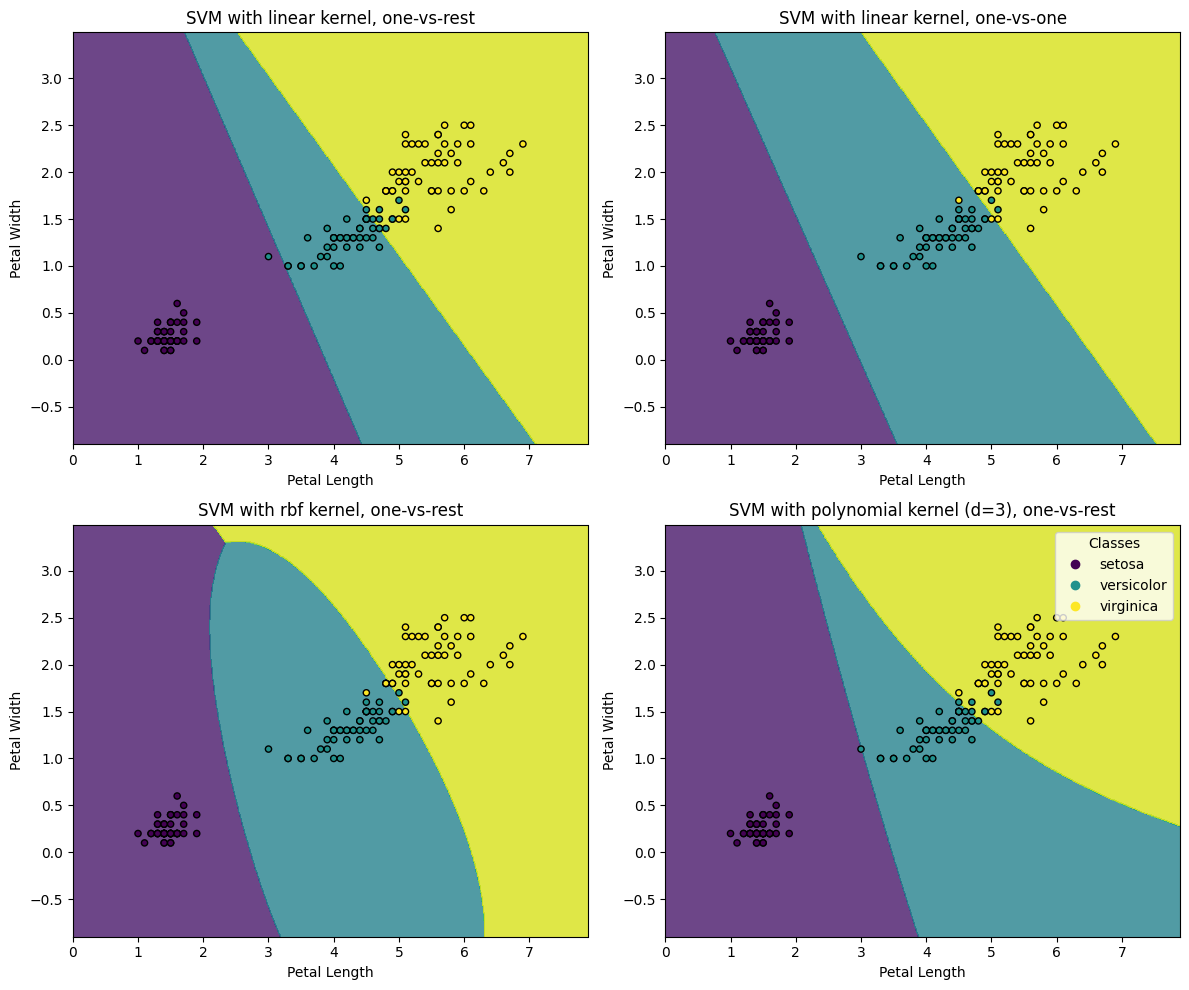

In [12]:
accuracies = {}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (title, model) in enumerate(models.items()):
    ax = axes[i]
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    accuracies[title] = acc

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)

    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    ax.set_title(title)
    ax.set_xlabel('Petal Length')
    ax.set_ylabel('Petal Width')

handles, labels = scatter.legend_elements()
plt.legend(handles, iris.target_names, loc='upper right', title="Classes")

plt.tight_layout()
plt.show()

In [13]:
print("Model Accuracies:")
for model_name, acc in accuracies.items():
    print(f"{model_name}: {acc:.2f}")

Model Accuracies:
SVM with linear kernel, one-vs-rest: 0.93
SVM with linear kernel, one-vs-one: 0.97
SVM with rbf kernel, one-vs-rest: 0.95
SVM with polynomial kernel (d=3), one-vs-rest: 0.95
